__Import the libraries__

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

__Read the data file and check for any missing values__

In [5]:
df = pd.read_csv("Project_Data_1.csv")
df.sample(5)

,Sales of Wheat in tons,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
188,Turks and Caicos Islands,42,40,37,35,33,31,30,29,28,17,16,23,23,22,22,22,18,17
37,Central African Republic,318,336,342,350,356,365,270,395,419,449,485,495,468,566,574,507,437,425
206,Zimbabwe,409,417,415,419,426,439,453,481,392,430,479,523,571,632,652,680,699,714
40,China,327,321,315,309,303,303,290,283,276,273,269,265,259,241,220,206,200,194
60,Equatorial Guinea,169,181,187,194,200,207,216,222,236,253,274,441,470,490,370,366,358,469


In [7]:
print(df.columns.tolist())

['Sales of Wheat in tons', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007']


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Sales of Wheat in tons  207 non-null    object
 1   1990                    207 non-null    object
 2   1991                    207 non-null    object
 3   1992                    207 non-null    object
 4   1993                    207 non-null    object
 5   1994                    207 non-null    object
 6   1995                    207 non-null    object
 7   1996                    207 non-null    int64 
 8   1997                    207 non-null    int64 
 9   1998                    207 non-null    int64 
 10  1999                    207 non-null    int64 
 11  2000                    207 non-null    int64 
 12  2001                    207 non-null    int64 
 13  2002                    207 non-null    int64 
 14  2003                    207 non-null    int64 
 15  2004  

In [73]:
df.isnull().sum()

Sales of Wheat in tons    0
1990                      0
1991                      0
1992                      0
1993                      0
1994                      0
1995                      0
1996                      0
1997                      0
1998                      0
1999                      0
2000                      0
2001                      0
2002                      0
2003                      0
2004                      0
2005                      0
2006                      0
2007                      0
cluster2                  0
dtype: int64

__Cleaning the data__

In [27]:
df['1990']= df['1990'].str.replace(',',"")
df['1991']= df['1991'].str.replace(',',"")
df['1992']= df['1992'].str.replace(',',"")
df['1993']= df['1993'].str.replace(',',"")
df['1994']= df['1994'].str.replace(',',"")
df['1995']= df['1995'].str.replace(',',"")
df['2004']= df['2004'].str.replace(',',"")
df['2005']= df['2004'].str.replace(',',"")
df['2006']= df['2004'].str.replace(',',"")
df['2007']= df['2004'].str.replace(',',"")

In [29]:
df[['1990','1991', '1992', '1993', '1994', '1995','2004', '2005', '2006', '2007']]= df[['1990','1991', '1992', '1993', '1994', '1995','2004', '2005', '2006', '2007']].astype('int64')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Sales of Wheat in tons  207 non-null    object
 1   1990                    207 non-null    int64 
 2   1991                    207 non-null    int64 
 3   1992                    207 non-null    int64 
 4   1993                    207 non-null    int64 
 5   1994                    207 non-null    int64 
 6   1995                    207 non-null    int64 
 7   1996                    207 non-null    int64 
 8   1997                    207 non-null    int64 
 9   1998                    207 non-null    int64 
 10  1999                    207 non-null    int64 
 11  2000                    207 non-null    int64 
 12  2001                    207 non-null    int64 
 13  2002                    207 non-null    int64 
 14  2003                    207 non-null    int64 
 15  2004  

__As we need to make this across years we need to apply PCA first__

In [31]:
X = df.drop('Sales of Wheat in tons',axis=1)


In [32]:
from sklearn.preprocessing import StandardScaler
X= StandardScaler().fit_transform(X)
X

array([[ 1.03110452,  1.01641938,  1.02196785, ...,  0.51947036,
         0.51947036,  0.51947036],
       [-0.66846748, -0.68394081, -0.67693899, ..., -0.69018075,
        -0.69018075, -0.69018075],
       [-0.65552658, -0.66645639, -0.66356177, ..., -0.58064542,
        -0.58064542, -0.58064542],
       ...,
       [ 0.29347302,  0.28207359,  0.31297523, ..., -0.17107851,
        -0.17107851, -0.17107851],
       [ 1.03110452,  1.13443924,  1.34302111, ...,  1.40051545,
         1.40051545,  1.40051545],
       [ 0.91463639,  0.96396611,  0.99075433, ...,  2.27679815,
         2.27679815,  2.27679815]])

In [35]:
pca= PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents)

In [34]:
np.cumsum(pca.explained_variance_ratio_*100)

array([ 92.39538861,  97.92309535,  99.01374792,  99.26297631,
        99.49888196,  99.65870725,  99.75657534,  99.83150193,
        99.8828166 ,  99.92724492,  99.9555837 ,  99.97290223,
        99.98670337,  99.99760688, 100.        , 100.        ,
       100.        , 100.        ])

In [36]:
principalDf

,0,1
0,3.584786,0.858913
1,-2.943227,0.016130
2,-2.751701,-0.153355
3,-3.461650,0.023427
4,-3.196126,0.050598
...,...,...
202,-1.101682,0.499356
203,-2.818139,0.061937
204,0.239981,0.835923
205,7.459023,-0.161461


__Plot elbow chart or scree plot to find out optimal number of clusters__

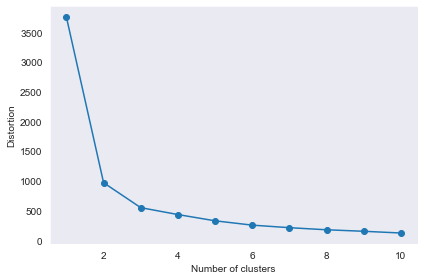

In [74]:
distortion = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,random_state = 42)
    kmeans.fit(principalDf)
    distortion.append(kmeans.inertia_)
plt.plot(range(1,11),distortion,marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

__Then try to apply K means, Hierarchicalclustering and showcase the results__

In [75]:
kmeans = KMeans(n_clusters = 2,random_state = 42)
kmeans.fit(principalDf)

KMeans(n_clusters=2, random_state=42)

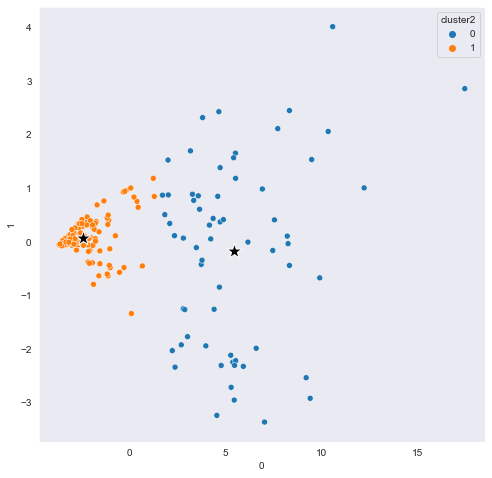

In [76]:
plt.figure(figsize = (8,8))
principalDf['cluster2'] = kmeans.labels_
sns.set_style('dark')
sns.scatterplot(x = 0, y = 1,data=principalDf, hue='cluster2')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 250,c = 'black',marker = '*',edgecolor = 'white',label = 'centroids')
plt.show()

In [57]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters = 3,affinity = 'euclidean',linkage = 'complete')
labels = ac.fit_predict(principalDf)
print('Cluster labels: %s' % labels)

Cluster labels: [0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1
 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 2 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1
 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1
 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]


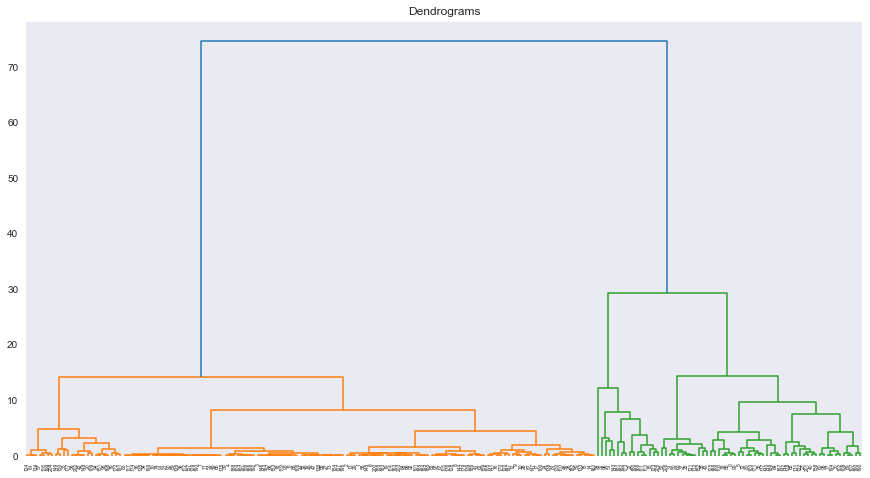

In [60]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(15,8))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(principalDf, method='ward'))

In [61]:
principalDf

,0,1,cluster,cluster2
0,3.584786,0.858913,0,0
1,-2.943227,0.016130,1,1
2,-2.751701,-0.153355,1,1
3,-3.461650,0.023427,1,1
4,-3.196126,0.050598,1,1
...,...,...,...,...
202,-1.101682,0.499356,1,1
203,-2.818139,0.061937,1,1
204,0.239981,0.835923,1,1
205,7.459023,-0.161461,2,0


In [63]:
df['cluster2'] = principalDf.cluster2
df

,Sales of Wheat in tons,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,cluster2
0,Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,283,283,283,0
1,Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,29,29,1
2,Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,52,52,52,1
3,American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,9,9,9,1
4,Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,19,19,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Wallis et Futuna,126,352,64,174,172,93,123,213,107,105,103,13,275,147,63,63,63,63,1
203,West Bank and Gaza,55,54,54,52,52,50,49,46,44,42,40,39,37,36,35,35,35,35,1
204,Yemen,265,261,263,253,250,244,233,207,194,175,164,154,149,146,138,138,138,138,1
205,Zambia,436,456,494,526,556,585,602,626,634,657,658,680,517,478,468,468,468,468,0


In [66]:
condition1 = df.cluster2 == 0
condition2 = df.cluster2 == 1
df_cluster_0 = df.loc[condition1]
df_cluster_1 = df.loc[condition2]

In [68]:
df_cluster_0.sample()

,Sales of Wheat in tons,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,cluster2
69,Gambia,350,350,349,347,344,341,324,321,311,485,491,499,335,343,341,341,341,341,0


In [69]:
df_cluster_1.sample()

,Sales of Wheat in tons,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,cluster2
42,Comoros,188,177,167,157,148,140,130,155,120,143,112,103,104,107,99,99,99,99,1


In [70]:
df_cluster_0['Sales of Wheat in tons'].to_list()

['Afghanistan',
 'Angola',
 'Bangladesh',
 'Bhutan',
 'Bolivia',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'China',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Korea, Dem. Rep.',
 'Congo, Dem. Rep.',
 'Djibouti',
 'Equatorial Guinea',
 'Ethiopia',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'India',
 'Indonesia',
 'Kenya',
 'Kiribati',
 'Laos',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mongolia',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nepal',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Papua New Guinea',
 'Philippines',
 'Rwanda',
 'Sao Tome and Principe',
 'Senegal',
 'Sierra Leone',
 'Solomon Islands',
 'Somalia',
 'South Africa',
 'Sudan',
 'Swaziland',
 'Timor-Leste',
 'Togo',
 'Tuvalu',
 'Uganda',
 'Tanzania',
 'Viet Nam',
 'Zambia',
 'Zimbabwe']

In [ ]:
# The countries that fall in cluster 0 are importing more thus India is exporting more to this countries

In [71]:
df_cluster_1['Sales of Wheat in tons'].to_list()

['Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bosnia and Herzegovina',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Chile',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Eritrea',
 'Estonia',
 'Fiji',
 'Finland',
 'France',
 'French Polynesia',
 'Georgia',
 'Germany',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guyana',
 'Honduras',
 'Hungary',
 'Iceland',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kuwait',
 'Kyrgyzstan',
 'Latvia',
 'Lebanon',
 'Libyan Arab Jamahiriya',
 'Lithuania',
 'Luxembourg',
 

In [72]:
#The countries that fall in cluster 1 are importing less and thus India is exporting to less in these countries,
#so the company should come up with an effective strategy to increase sales in these countries.